Jumlah data: (395, 33)

Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395

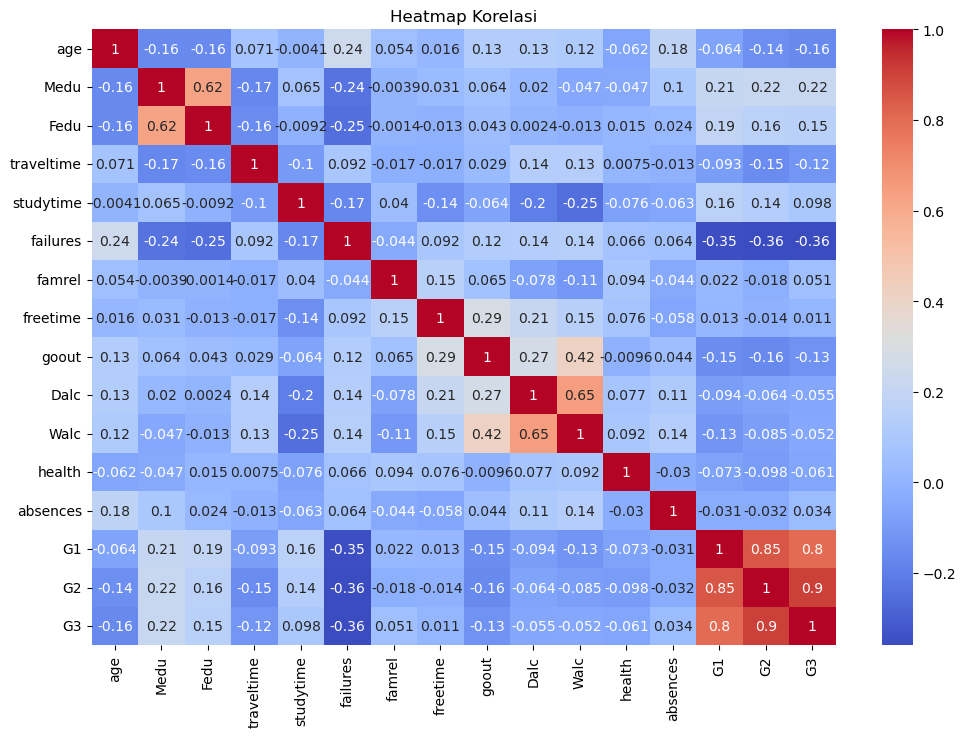


Evaluasi Regresi Linear:
MSE: 6.65994387189486
R2 Score: 0.6970282658827096


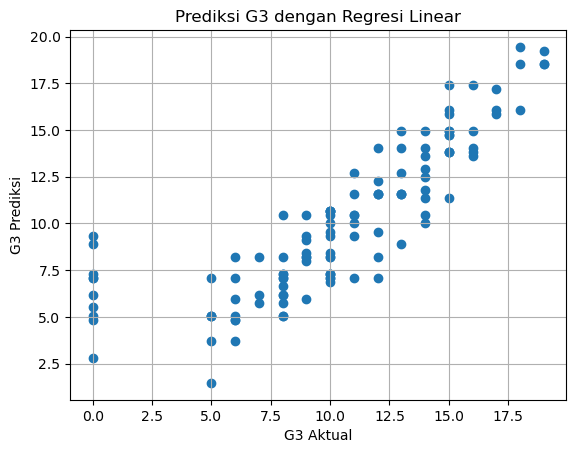

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


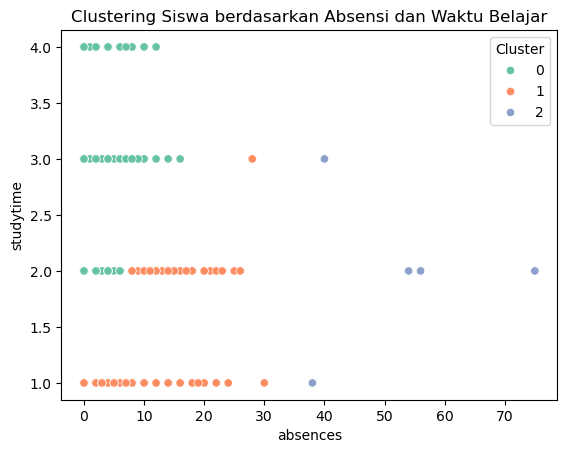


Evaluasi Klasifikasi (Random Forest):
              precision    recall  f1-score   support

       False       0.93      0.89      0.91        46
        True       0.93      0.96      0.95        73

    accuracy                           0.93       119
   macro avg       0.93      0.93      0.93       119
weighted avg       0.93      0.93      0.93       119



In [1]:
# Analisis Data Student Performance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("student-mat.csv", sep=";")

# EDA Awal
print("Jumlah data:", df.shape)
print("\nInfo data:")
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe())

# Korelasi numerik
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()

# Regresi Linear: prediksi G3 dari G1 dan studytime
X = df[['G1', 'studytime']]
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nEvaluasi Regresi Linear:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("G3 Aktual")
plt.ylabel("G3 Prediksi")
plt.title("Prediksi G3 dengan Regresi Linear")
plt.grid()
plt.show()

# Clustering: berdasarkan absences dan studytime
clustering_data = df[['absences', 'studytime']]
scaler = StandardScaler()
scaled = scaler.fit_transform(clustering_data)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

sns.scatterplot(data=df, x='absences', y='studytime', hue='Cluster', palette='Set2')
plt.title("Clustering Siswa berdasarkan Absensi dan Waktu Belajar")
plt.show()

# Klasifikasi: prediksi lulus (G3 >= 10)
df['pass'] = df['G3'] >= 10
features = ['G1', 'G2', 'studytime']
X = df[features]
y = df['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\nEvaluasi Klasifikasi (Random Forest):")
print(classification_report(y_test, y_pred))
